## Mini Project III

In [704]:
# this is my test code

In [705]:
# please let this be the last test

**Processes Required:**
- Data Preparation & Feature Engineering
  - Check for outliers
  - Check for missing values (acct_end_date, channel on Transactions tables)
  - Variable Transformations
      - Customer Table - dummy variable for gender, 
      - Date Ranges (years, months, days)
      - Normalization, Standardization - Difference in models with either?

- Data Wrangling
 - SQL Database?
 - Data Summary?

- Data Visualization
 - **Visuals**
 - Radar graphs
 - Scree Plots for PCA
 - Heatmap
 
 - **Platform**
 - PowerPoint (canva)
 - Tableau
 - Jupyter Lab Notebook

 - Dimensionality Reduction
 - Dependent on PCA, LDA
 - 
  
- Unsupervised Learning


**Presentation**

- Format
- Focus

- Demographics
 - Customers table
   - Gender
   - Age
   - Marital Status
   - State
   - City
   - Number of Children
   - State Regions 
 
 - To do
   - Clustering preparation
   - Dummy Variables (Gender/Region/isSenior/hasChildren/ageGroup)
   - Scaling (Normalization/Standardization)
   - Check for outliers, missing values, additional values, scale, transform (dummy)

- Banking Behaviour


In [706]:
import pandas as pd
import seaborn as sns
import datetime as dt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Data Wrangling

In [707]:
df_list = []
table_name_list = [
    'twm_accounts', 'twm_checking_acct', 'twm_checking_tran', 'twm_credit_acct',
    'twm_credit_tran', 'twm_customer', 'twm_savings_acct', 'twm_savings_tran', 'twm_transactions'
    ]

for i in table_name_list:
    df = pd.read_csv(i+'.csv', sep=';')
    df_list.append(df)

In [708]:
accounts_df = df_list[0]
checking_acct_df = df_list[1]
checking_tran_df = df_list[2]
credit_acct_df = df_list[3]
credit_tran_df = df_list[4]
customer_df = df_list[5]
savings_acct_df = df_list[6]
savings_tran_df = df_list[7]
transactions_df = df_list[8]


# Data Preparation & Feature Engineering

### Customer Table

##### Step 1 - EDA

In [709]:
customer_df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [710]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


In [711]:
customer_df.shape

(747, 15)

In [712]:
customer_df.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000


In [713]:
# check for dupes for Id
idsUnique = len(set(customer_df.cust_id))
idsTotal = customer_df.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)

0


In [714]:
customer_df['city_name'].nunique()

69

In [715]:
customer_df['state_code'].nunique()

33

C:\Users\jrilk\AppData\Local\Temp\ipykernel_11088\1682001555.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

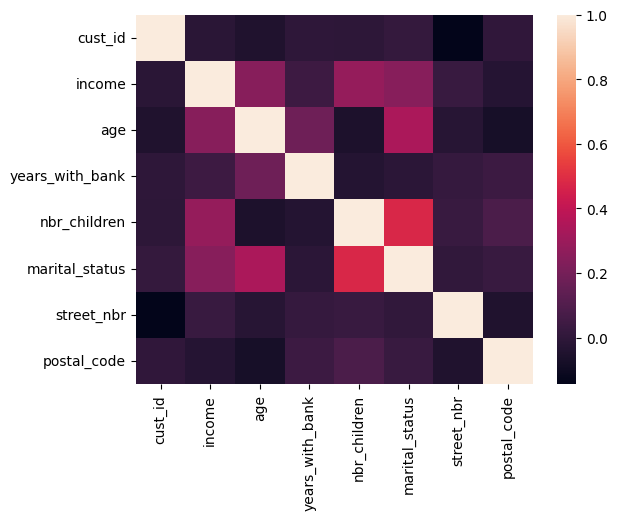

In [716]:
import seaborn as sns
sns.heatmap(customer_df.corr())

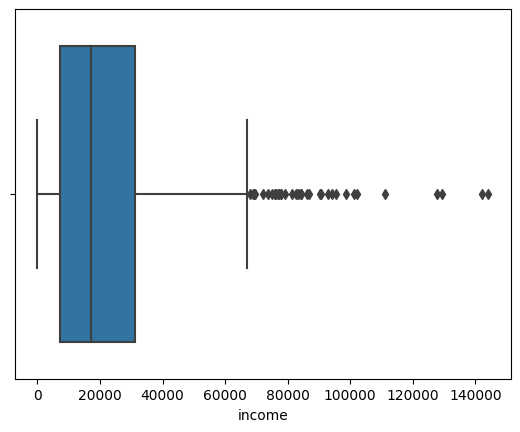

In [717]:
# Outlier Detection
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=customer_df['income'])

plt.show()

In [718]:
from scipy import stats
import numpy as np

#Finding Z Score on Column
stats.zscore(customer_df['income'])

#Turning Absolute
np.abs(stats.zscore(customer_df['income']))

#view the outliers
customer_df['income'][(np.abs(stats.zscore(customer_df['income'])) > 3)]

64     144157
108     90248
153     95585
246    129196
339    101177
419    111004
422    127848
479     90592
484     98566
490    102286
525     93060
595     94123
639    142274
Name: income, dtype: int64

In [719]:
# There are a handful of very high incomes, but nothing that seems unrealistic

In [720]:
# check for missing values
customer_df.isnull().sum()

cust_id            0
income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
name_prefix        0
first_name         0
last_name          0
street_nbr         0
street_name        0
postal_code        0
city_name          0
state_code         0
dtype: int64

#### Step 2 - Data Preparation & Feature Engineering

In [721]:
# there appear to be empty values for name_prefix even though not null

customer_df['name_prefix'][0]

'        '

In [722]:
# strip extra spaces from name_prefix

customer_df['name_prefix'] = customer_df['name_prefix'].str.strip()
sum(customer_df['name_prefix'] == '')

505

In [723]:
# examine counts of each category in name_prefix - 505 missing values

customer_df['name_prefix'].value_counts()

        505
Ms.      92
Mr.      82
Mrs.     31
Dr.      22
Miss     15
Name: name_prefix, dtype: int64

In [724]:
# replace with Miss with Ms.

customer_df = customer_df.replace({"name_prefix" : {'Miss': "Ms."}})

In [725]:
customer_df['name_prefix'].value_counts()

        505
Ms.     107
Mr.      82
Mrs.     31
Dr.      22
Name: name_prefix, dtype: int64

In [726]:
# customer_df[.groupby(['name_prefix']).agg('marital_status').count()]

In [727]:
# Add a region feature that groups states into four regions
# Region Dictionary for States *includes DC

state_region = {
    'WA': 'West',
    'OR': 'West',
    'CA': 'West',
    'AK': 'West',
    'HI': 'West',
    'ID': 'West',
    'MT': 'West',
    'WY': 'West',
    'NV': 'West',
    'UT': 'West',
    'CO': 'West',
    'AZ': 'West',
    'NM': 'West',
    'ND': 'Midwest',
    'SD': 'Midwest',
    'MN': 'Midwest',
    'NE': 'Midwest',
    'KS': 'Midwest',
    'IA': 'Midwest',
    'MO': 'Midwest',
    'WI': 'Midwest',
    'IL': 'Midwest',
    'MI': 'Midwest',
    'IN': 'Midwest',
    'OH': 'Midwest',
    'VT': 'Northeast',
    'ME': 'Northeast',
    'NH': 'Northeast',
    'MA': 'Northeast',
    'NY': 'Northeast',
    'PA': 'Northeast',
    'RI': 'Northeast',
    'CT': 'Northeast',
    'NJ': 'Northeast',
    'DE': 'South',
    'MD': 'South',
    'WV': 'South',
    'DC': 'South',
    'VA': 'South',
    'KY': 'South',
    'NC': 'South',
    'OK': 'South',
    'TX': 'South',
    'AR': 'South',
    'LA': 'South',
    'MS': 'South',
    'AL': 'South',
    'TN': 'South',
    'SC': 'South',
    'GA': 'South',
    'FL': 'South',
}
len(state_region)

51

In [728]:
# check if values in df match dictionary

customer_df['state_code'][0] in state_region

False

In [729]:
customer_df['state_code'][0]

'NV  '

In [730]:
# strip extra spaces

customer_df['state_code'] = customer_df['state_code'].str.strip()

In [731]:
customer_df['state_code'][0]

'NV'

In [732]:
customer_df["region"] = customer_df["state_code"].map(state_region)
customer_df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,region
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,West
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,West
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,West
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,West
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,West
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,Northeast
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,West
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,South


In [733]:
# create a senior/not senior boolean

age_bool = customer_df['age'] >= 65

customer_df['is_senior'] = age_bool

# customer_df['senior'] = customer_df.loc[np.where(customer_df['age'] > 65)] = 'True'

In [734]:
customer_df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,region,is_senior
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,West,False
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,West,True
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,West,False
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,West,False
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,Northeast,False


In [735]:
# create a children/no children boolean

child_bool = customer_df['nbr_children'] > 0

customer_df['has_children'] = child_bool

In [736]:
customer_df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,region,is_senior,has_children
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,West,False,True
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,West,True,False
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,West,False,False
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,West,False,False
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,Northeast,False,True


In [737]:
#Binning with q-cut (bin according to quantiles)
pd.qcut(customer_df['age'], q = 4).value_counts()

(12.999, 28.0]    196
(28.0, 42.0]      187
(56.0, 89.0]      183
(42.0, 56.0]      181
Name: age, dtype: int64

In [738]:
customer_df.loc[customer_df['age']<=32, 'age_group'] = 'under 32'
customer_df.loc[customer_df['age'].between(32,51), 'age_group'] = '32-51'
customer_df.loc[customer_df['age'].between(52,70), 'age_group'] = '52-70'
customer_df.loc[customer_df['age']>70, 'age_group'] = 'over 70'

In [739]:
customer_df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,region,is_senior,has_children,age_group
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,West,False,True,32-51
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,West,True,False,over 70
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,West,False,False,32-51
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,West,False,False,52-70
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,Northeast,False,True,52-70


### Accounts Tables

#### Step 1 - EDA

In [740]:
accounts_df.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [741]:
accounts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acct_nbr          1409 non-null   int64  
 1   cust_id           1409 non-null   int64  
 2   acct_type         1409 non-null   object 
 3   account_active    1409 non-null   object 
 4   acct_start_date   1409 non-null   object 
 5   acct_end_date     143 non-null    object 
 6   starting_balance  1409 non-null   float64
 7   ending_balance    1409 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 88.2+ KB


In [742]:
accounts_df['acct_nbr'].nunique()

1409

In [743]:
checking_acct_df.head()

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.00,Y,11.11.1986,NaN,6004.34,569.65
1,1362487,13624872,3000,0.00,Y,12.1.1995,NaN,2781.07,1401.21
2,1363017,13630172,3000,0.00,Y,19.3.1994,NaN,2694.91,147.15
3,1362752,13627522,100,0.15,Y,8.1.1994,NaN,487.69,3.76
4,1363282,13632822,100,0.15,Y,5.3.1988,NaN,133.90,84.18


In [906]:
checking_acct_df.agg().value_counts()

TypeError: Must provide 'func' or tuples of '(column, aggfunc).

In [744]:
checking_acct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           520 non-null    int64  
 1   acct_nbr          520 non-null    int64  
 2   minimum_balance   520 non-null    int64  
 3   per_check_fee     520 non-null    float64
 4   account_active    520 non-null    object 
 5   acct_start_date   520 non-null    object 
 6   acct_end_date     52 non-null     object 
 7   starting_balance  520 non-null    float64
 8   ending_balance    520 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 36.7+ KB


In [745]:
credit_acct_df.head()

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00


In [746]:
credit_acct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           468 non-null    int64  
 1   acct_nbr          468 non-null    int64  
 2   credit_limit      468 non-null    int64  
 3   credit_rating     468 non-null    int64  
 4   account_active    468 non-null    object 
 5   acct_start_date   468 non-null    object 
 6   acct_end_date     45 non-null     object 
 7   starting_balance  468 non-null    float64
 8   ending_balance    468 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 33.0+ KB


In [747]:
savings_acct_df.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [748]:
savings_acct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           421 non-null    int64  
 1   acct_nbr          421 non-null    int64  
 2   minimum_balance   421 non-null    int64  
 3   acct_type         421 non-null    object 
 4   account_active    421 non-null    object 
 5   acct_start_date   421 non-null    object 
 6   acct_end_date     46 non-null     object 
 7   starting_balance  421 non-null    float64
 8   ending_balance    421 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 29.7+ KB


<AxesSubplot: xlabel='cust_id', ylabel='Count'>

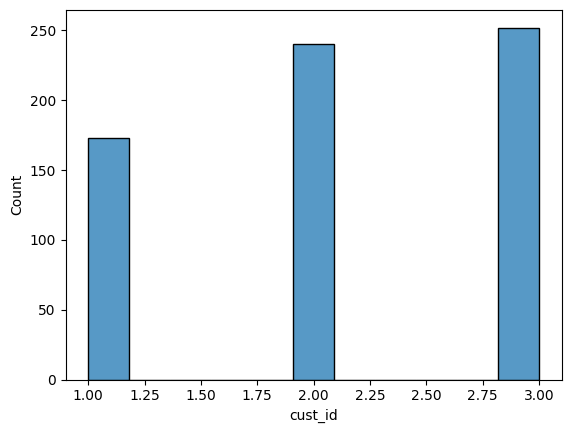

In [749]:
total_accounts = accounts_df.groupby('cust_id').agg('cust_id').value_counts()
sns.histplot(total_accounts)

#### Step 2 - Accounts Table Merge

In [849]:
# Merging of tables on Left join to capture distinct account numbers and pull specific data points into the new merged tables

new_accounts_df = pd.merge(accounts_df, checking_acct_df[['acct_nbr','per_check_fee','minimum_balance']], on=['acct_nbr'], how='left')
new_accounts_df = pd.merge(new_accounts_df, credit_acct_df[['acct_nbr', 'credit_limit', 'credit_rating']], on=['acct_nbr'], how='left')
new_accounts_df = pd.merge(new_accounts_df, savings_acct_df[['acct_nbr', 'minimum_balance', 'acct_type']], on=['acct_nbr'], how='left')
new_accounts_df.head()

,acct_nbr,cust_id,acct_type_x,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,per_check_fee,minimum_balance_x,credit_limit,credit_rating,minimum_balance_y,acct_type_y
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,NaN,NaN,NaN,NaN,500.0,MM
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,NaN,NaN,1000.0,0.0,NaN,NaN
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,NaN,NaN,1000.0,0.0,NaN,NaN
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,0.0,3000.0,NaN,NaN,NaN,NaN
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,NaN,NaN,1300.0,0.0,NaN,NaN


In [850]:
# renaming of minimum balance columns to specify which accounts they are from
# reallocating account type names to remove ambiguity on the source of information

new_accounts_df[['minimum_balance_CK', 'minimum_balance_SV', 'SV_acct_type', 'acct_type']] = new_accounts_df[['minimum_balance_x','minimum_balance_y', 'acct_type_y', 'acct_type_x']]
new_accounts_df = new_accounts_df.drop(['minimum_balance_x','minimum_balance_y', 'acct_type_y', 'acct_type_x'], axis=1)
new_accounts_df.head()

,acct_nbr,cust_id,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,per_check_fee,credit_limit,credit_rating,minimum_balance_CK,minimum_balance_SV,SV_acct_type,acct_type
0,13628063,1362806,Y,10.12.1995,NaN,1430.22,284.58,NaN,NaN,NaN,NaN,500.0,MM,SV
1,4561143213627090,1362709,Y,15.3.1993,NaN,266.34,496.15,NaN,1000.0,0.0,NaN,NaN,NaN,CC
2,4561143213628360,1362836,Y,18.3.1992,NaN,55.90,1000.00,NaN,1000.0,0.0,NaN,NaN,NaN,CC
3,13633112,1363311,Y,6.7.1995,NaN,11017.13,968.46,0.0,NaN,NaN,3000.0,NaN,NaN,CK
4,4561143213633610,1363361,Y,17.6.1994,NaN,849.37,462.28,NaN,1300.0,0.0,NaN,NaN,NaN,CC


#### Adding in Dummy Features for Accounts

In [851]:
# creating dummy accounts for nominal categories, convert acct_start_date to TS, add account age onto DF, strip ' ' from column names

new_accounts_df = pd.merge(new_accounts_df, pd.get_dummies(new_accounts_df[['acct_nbr', 'acct_type', 'SV_acct_type']]), on=['acct_nbr'], how='left')

new_accounts_df['acct_age'] = dt.datetime.now().year - pd.DatetimeIndex(new_accounts_df['acct_start_date']).year
new_accounts_df['acct_start_date'] = pd.DatetimeIndex(new_accounts_df['acct_start_date'])

new_accounts_df.columns = new_accounts_df.columns.str.strip()
new_accounts_df.head()


C:\Users\jrilk\AppData\Local\Temp\ipykernel_11088\3387007810.py:5: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

C:\Users\jrilk\AppData\Local\Temp\ipykernel_11088\3387007810.py:6: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



,acct_nbr,cust_id,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,per_check_fee,credit_limit,credit_rating,minimum_balance_CK,minimum_balance_SV,SV_acct_type,acct_type,acct_type_CC,acct_type_CK,acct_type_SV,SV_acct_type_BS,SV_acct_type_MM,acct_age
0,13628063,1362806,Y,1995-10-12,NaN,1430.22,284.58,NaN,NaN,NaN,NaN,500.0,MM,SV,0,0,1,0,1,27
1,4561143213627090,1362709,Y,1993-03-15,NaN,266.34,496.15,NaN,1000.0,0.0,NaN,NaN,NaN,CC,1,0,0,0,0,29
2,4561143213628360,1362836,Y,1992-03-18,NaN,55.90,1000.00,NaN,1000.0,0.0,NaN,NaN,NaN,CC,1,0,0,0,0,30
3,13633112,1363311,Y,1995-06-07,NaN,11017.13,968.46,0.0,NaN,NaN,3000.0,NaN,NaN,CK,0,1,0,0,0,27
4,4561143213633610,1363361,Y,1994-06-17,NaN,849.37,462.28,NaN,1300.0,0.0,NaN,NaN,NaN,CC,1,0,0,0,0,28


In [852]:
# capturing the various features of the data to eliminate or provide filters on specific rows in the future
# drop account start date

numeric_feats = new_accounts_df.dtypes[new_accounts_df.dtypes != 'object'].index.tolist()
dummy_feats = new_accounts_df.dtypes[new_accounts_df.dtypes == 'uint8'].index.tolist()

numeric_accounts_df = new_accounts_df[numeric_feats].drop('acct_start_date',axis=1)
numeric_accounts_df.head()

,acct_nbr,cust_id,starting_balance,ending_balance,per_check_fee,credit_limit,credit_rating,minimum_balance_CK,minimum_balance_SV,acct_type_CC,acct_type_CK,acct_type_SV,SV_acct_type_BS,SV_acct_type_MM,acct_age
0,13628063,1362806,1430.22,284.58,NaN,NaN,NaN,NaN,500.0,0,0,1,0,1,27
1,4561143213627090,1362709,266.34,496.15,NaN,1000.0,0.0,NaN,NaN,1,0,0,0,0,29
2,4561143213628360,1362836,55.90,1000.00,NaN,1000.0,0.0,NaN,NaN,1,0,0,0,0,30
3,13633112,1363311,11017.13,968.46,0.0,NaN,NaN,3000.0,NaN,0,1,0,0,0,27
4,4561143213633610,1363361,849.37,462.28,NaN,1300.0,0.0,NaN,NaN,1,0,0,0,0,28


#### Step 3 - Optional Merge of Customer Details with Accounts Details

In [756]:
# Optional merge of customer records into accounts records

df_customer_accounts = pd.merge(new_accounts_df_clean, customer_df, on=['cust_id'], how='left')
df_customer_accounts
# df_customer_accounts.groupby('cust_id').agg('acct_nbr').value_counts()

,acct_nbr,cust_id,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,per_check_fee,credit_limit,credit_rating,...,last_name,street_nbr,street_name,postal_code,city_name,state_code,region,is_senior,has_children,age_group
0,13628063,1362806,Y,10.12.1995,NaN,1430.22,284.58,NaN,NaN,NaN,...,McCarthy ...,15648,Juniper ...,60605,Chicago,IL,Midwest,False,True,under 32
1,4561143213627090,1362709,Y,15.3.1993,NaN,266.34,496.15,NaN,1000.0,0.0,...,Malcom ...,4922,Alamo ...,90190,Los Angeles,CA,West,True,False,over 70
2,4561143213628360,1362836,Y,18.3.1992,NaN,55.90,1000.00,NaN,1000.0,0.0,...,McConahay ...,6561,Lotus ...,38166,Memphis,TN,South,True,False,52-70
3,13633112,1363311,Y,6.7.1995,NaN,11017.13,968.46,0.0,NaN,NaN,...,Kemper ...,8642,A ...,90135,Los Angeles,CA,West,False,False,32-51
4,4561143213633610,1363361,Y,17.6.1994,NaN,849.37,462.28,NaN,1300.0,0.0,...,Griggs ...,16955,Ash ...,97297,Portland,OR,West,False,True,32-51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,4561143213625560,1362556,N,20.1.1992,19.8.1995,1433.94,20.00,NaN,2800.0,0.0,...,McCracken ...,17276,Cactus ...,28215,Charlotte,NC,South,False,False,32-51
1405,4561143213626240,1362624,Y,29.11.1990,NaN,632.75,1400.00,NaN,1400.0,0.0,...,Newton ...,4144,Kings ...,77099,Houston,TX,South,True,False,over 70
1406,4561143213628750,1362875,Y,24.2.1989,NaN,2810.91,3000.00,NaN,3000.0,0.0,...,McLaughlin ...,9837,Seventh ...,35233,Birmingham,AL,South,True,False,52-70
1407,13626543,1362654,Y,17.10.1992,NaN,784.53,622.46,NaN,NaN,NaN,...,Olszewski ...,12513,Camellia ...,78473,Corpus Christi,TX,South,False,False,under 32


#### Step 4: Scaling and Normalization

In [853]:
# Putting the various account types back into their own dataframes as PCA will not work with NaN
# Dropping the columns that have NaN

CC_drop = ['acct_start_date', 'acct_nbr', 'cust_id', 'acct_type_CK', 'acct_type_SV', 'acct_type_CC', 'account_active', 'acct_type', 'SV_acct_type_BS', 'SV_acct_type_MM'] # , 'account_active_N', 'account_active_Y'
CK_drop = ['acct_start_date', 'acct_nbr', 'cust_id', 'acct_type_CK', 'acct_type_SV', 'acct_type_CC', 'account_active', 'acct_type', 'SV_acct_type_BS', 'SV_acct_type_MM'] # , 'account_active_N', 'account_active_Y'
SV_drop = ['acct_start_date', 'acct_nbr', 'cust_id', 'acct_type_CK', 'acct_type_SV', 'acct_type_CC', 'account_active', 'acct_type', 'SV_acct_type'] # , 'account_active_N', 'account_active_Y'

CC_accounts_df = new_accounts_df.loc[(new_accounts_df['acct_type_CC']  == 1)]
CC_accounts_df = CC_accounts_df.dropna(axis='columns')
CC_accounts_df = CC_accounts_df.drop(CC_drop, axis=1)

CK_accounts_df = new_accounts_df.loc[(new_accounts_df['acct_type_CK']  == 1)]
CK_accounts_df = CK_accounts_df.dropna(axis='columns')
CK_accounts_df = CK_accounts_df.drop(CK_drop, axis=1)

SV_accounts_df = new_accounts_df.loc[(new_accounts_df['acct_type_SV']  == 1)]
SV_accounts_df = SV_accounts_df.dropna(axis='columns')
SV_accounts_df = SV_accounts_df.drop(SV_drop, axis=1)

SV_accounts_df

,starting_balance,ending_balance,minimum_balance_SV,SV_acct_type_BS,SV_acct_type_MM,acct_age
0,1430.22,284.58,500.0,0,1,27
12,139.95,141.92,100.0,1,0,34
13,610.91,1782.06,500.0,0,1,28
15,165.68,778.84,100.0,1,0,29
20,428.17,491.88,100.0,1,0,30
...,...,...,...,...,...,...
1388,213.91,1470.67,100.0,1,0,32
1389,232.00,310.32,100.0,1,0,27
1399,707.09,1187.97,100.0,1,0,30
1402,290.57,976.43,100.0,1,0,27


In [854]:
# scaler to be used on numerical accounts

scaler = MinMaxScaler()
scaled_account_CC = pd.DataFrame(scaler.fit_transform(CC_accounts_df))
scaled_account_CK = pd.DataFrame(scaler.fit_transform(CK_accounts_df))
scaled_account_SV = pd.DataFrame(scaler.fit_transform(SV_accounts_df))


#### Step 5a: Scaling and Clustering of Credit Accounts

In [855]:
# view of the scaled data for Credit accounts

scaled_account_CC.columns = CC_accounts_df.columns+['_scaled']
scaled_account_CC

,starting_balance_scaled,ending_balance_scaled,credit_limit_scaled,credit_rating_scaled,acct_age_scaled
0,0.023374,0.052226,0.000000,0.0,0.222222
1,0.004906,0.105263,0.000000,0.0,0.333333
2,0.074541,0.048661,0.018405,0.0,0.111111
3,0.000000,0.105263,0.000000,0.0,0.000000
4,0.000000,0.315789,0.122699,0.0,0.000000
...,...,...,...,...,...
463,0.165578,0.208516,0.067485,0.0,0.222222
464,0.428370,0.589474,0.282209,0.0,0.222222
465,0.125843,0.002105,0.110429,0.0,0.333333
466,0.055530,0.147368,0.024540,0.0,0.555556


In [856]:
# PCA for all 5 columns to determine the variance ratio

pcamodel = PCA(n_components=5)
pca = pcamodel.fit_transform(scaled_account_CC)
data_pca = pd.DataFrame(pca)
data_pca.columns = scaled_account_CC.columns
data_pca.head()

,starting_balance_scaled,ending_balance_scaled,credit_limit_scaled,credit_rating_scaled,acct_age_scaled
0,-0.033155,-0.143204,-0.025500,-0.017302,-0.003127
1,0.067388,-0.138744,-0.042511,0.053953,-0.001075
2,-0.129730,-0.093649,-0.016422,-0.070420,-0.028204
3,-0.258275,-0.107773,-0.037507,-0.005068,-0.025794
4,-0.269769,0.077718,-0.083098,0.144878,-0.009223


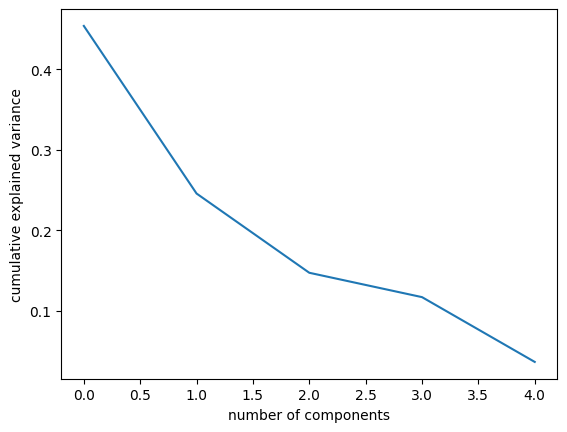

In [858]:
# variance ratio shows decline at the 2-4 PC level

plt.plot(pcamodel.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

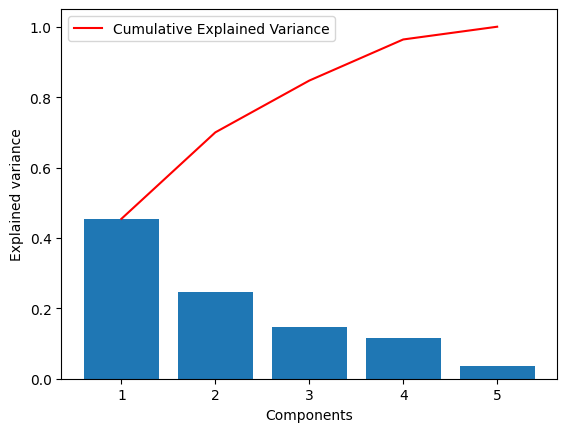

In [859]:
# Cumulative variance explained

plt.bar(range(1,len(pcamodel.explained_variance_ratio_ )+1),pcamodel.explained_variance_ratio_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ratio_ )+1),
         np.cumsum(pcamodel.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

In [862]:
# redo PCA for 2 components

pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(scaled_account_CC)
data_pca = pd.DataFrame(pca, columns=['PC1', 'PC2']) #, 'PC3', 'PC4'
# data_pca.columns = scaled_account_CC.columns
data_pca.head()

,PC1,PC2
0,-0.033155,-0.143204
1,0.067388,-0.138744
2,-0.129730,-0.093649
3,-0.258275,-0.107773
4,-0.269769,0.077718


Text(0.5, 1.0, 'My PCA Graph')

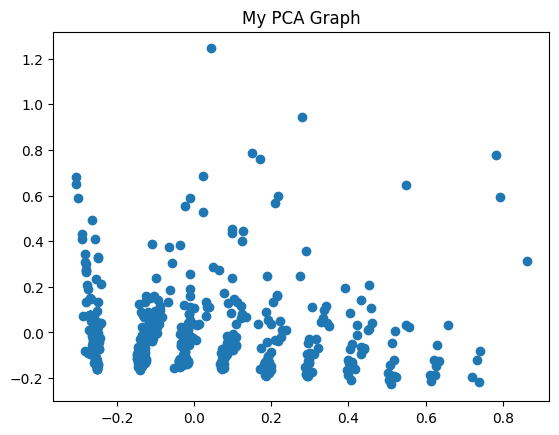

In [863]:
pca_df = pd.DataFrame(data_pca, columns=data_pca.columns)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')

#### Step 5b: Scaling and Clustering of Checking Accounts

In [864]:
# view of the scaled data for Credit accounts

scaled_account_CK.columns = CK_accounts_df.columns+['_scaled']
scaled_account_CK

,starting_balance_scaled,ending_balance_scaled,per_check_fee_scaled,minimum_balance_CK_scaled,acct_age_scaled
0,0.404746,0.073449,0.0,1.000000,0.000000
1,0.001922,0.003969,1.0,0.000000,0.000000
2,0.036107,0.016438,1.0,0.000000,0.000000
3,0.003870,0.028451,1.0,0.034483,0.333333
4,0.121986,0.069807,0.0,1.000000,0.222222
...,...,...,...,...,...
515,0.035843,0.004992,1.0,0.000000,0.000000
516,0.178490,0.001756,0.0,1.000000,0.666667
517,0.094436,0.194355,0.0,1.000000,0.444444
518,0.012184,0.047536,1.0,0.034483,0.000000


In [865]:
# PCA for all 7 columns to determine the variance ratio

pcamodel = PCA(n_components=5)
pca = pcamodel.fit_transform(scaled_account_CK)
data_pca = pd.DataFrame(pca)
data_pca.columns = scaled_account_CK.columns
data_pca.head()

,starting_balance_scaled,ending_balance_scaled,per_check_fee_scaled,minimum_balance_CK_scaled,acct_age_scaled
0,0.832866,-0.217126,0.148913,0.200836,-0.003228
1,-0.615258,-0.197686,-0.030183,0.007098,-0.009756
2,-0.611545,-0.197294,0.000051,0.026996,-0.010128
3,-0.584993,0.135128,-0.013700,-0.010992,0.015207
4,0.808526,0.001677,-0.023037,-0.025667,0.000245


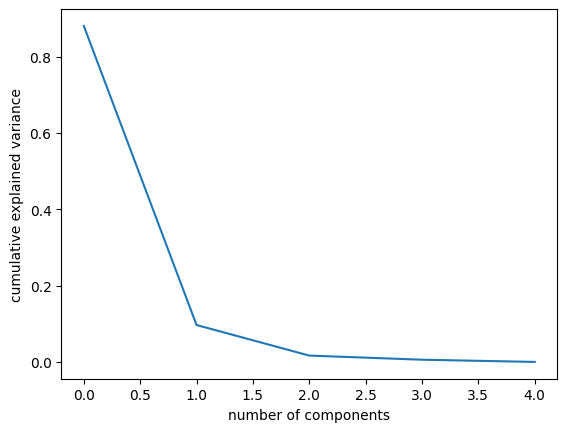

In [866]:
# variance ratio shows decline at the 2-4 PC level

plt.plot(pcamodel.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

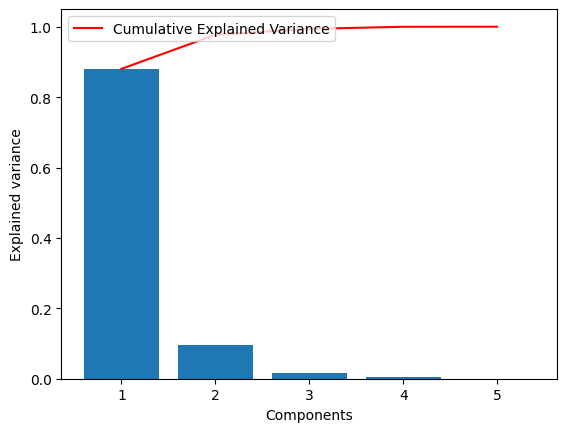

In [867]:
# Cumulative variance explained

plt.bar(range(1,len(pcamodel.explained_variance_ratio_ )+1),pcamodel.explained_variance_ratio_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ratio_ )+1),
         np.cumsum(pcamodel.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

In [868]:
# redo PCA for 2 components

pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(scaled_account_CK)
data_pca = pd.DataFrame(pca, columns=['PC1', 'PC2']) #, 'PC3', 'PC4'
# data_pca.columns = scaled_account_CK.columns
data_pca.head()

,PC1,PC2
0,0.832866,-0.217126
1,-0.615258,-0.197686
2,-0.611545,-0.197294
3,-0.584993,0.135128
4,0.808526,0.001677


Text(0.5, 1.0, 'My PCA Graph')

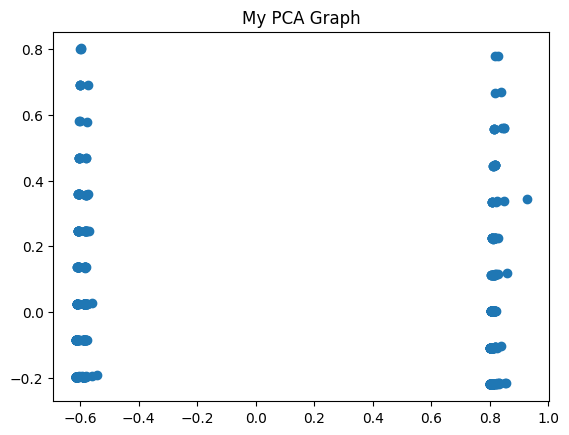

In [870]:
pca_df = pd.DataFrame(data_pca, columns=data_pca.columns)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
# plt.xlabel('PC1 - {0}%'.format(per_var[0]))
# plt.ylabel('PC2 - {0}%'.format(per_var[1]))

#### Step 5c: Scaling and Clustering of Savings Accounts

In [871]:
# view of the scaled data for Credit accounts

scaled_account_SV.columns = SV_accounts_df.columns+['_scaled']
scaled_account_SV

,starting_balance_scaled,ending_balance_scaled,minimum_balance_SV_scaled,SV_acct_type_BS_scaled,SV_acct_type_MM_scaled,acct_age_scaled
0,0.077310,0.012565,1.0,0.0,1.0,0.000000
1,0.002308,0.006205,0.0,1.0,0.0,0.777778
2,0.029685,0.079328,1.0,0.0,1.0,0.111111
3,0.003804,0.034601,0.0,1.0,0.0,0.222222
4,0.019062,0.021807,0.0,1.0,0.0,0.333333
...,...,...,...,...,...,...
416,0.006607,0.065445,0.0,1.0,0.0,0.555556
417,0.007659,0.013713,0.0,1.0,0.0,0.000000
418,0.035275,0.052841,0.0,1.0,0.0,0.333333
419,0.011064,0.043410,0.0,1.0,0.0,0.000000


In [872]:
# PCA for all 5 columns to determine the variance ratio

pcamodel = PCA(n_components=6)
pca = pcamodel.fit_transform(scaled_account_SV)
data_pca = pd.DataFrame(pca)
data_pca.columns = scaled_account_SV.columns
data_pca.head()

,starting_balance_scaled,ending_balance_scaled,minimum_balance_SV_scaled,SV_acct_type_BS_scaled,SV_acct_type_MM_scaled,acct_age_scaled
0,1.330537,-0.205693,-0.059868,-0.040732,-1.826425e-17,3.022595e-20
1,-0.426176,0.517964,-0.063946,-0.011244,2.273735e-17,3.991674e-20
2,1.326786,-0.094297,-0.052545,0.040473,1.094811e-15,-2.930241e-20
3,-0.408112,-0.036285,-0.024758,0.008684,1.472027e-17,2.343184e-18
4,-0.411275,0.074788,-0.026153,-0.011141,-7.125973e-18,-9.507571e-22


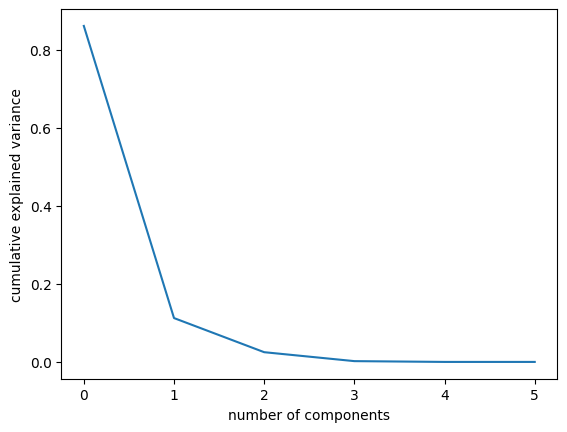

In [873]:
# variance ratio shows decline at the 2-4 PC level

plt.plot(pcamodel.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

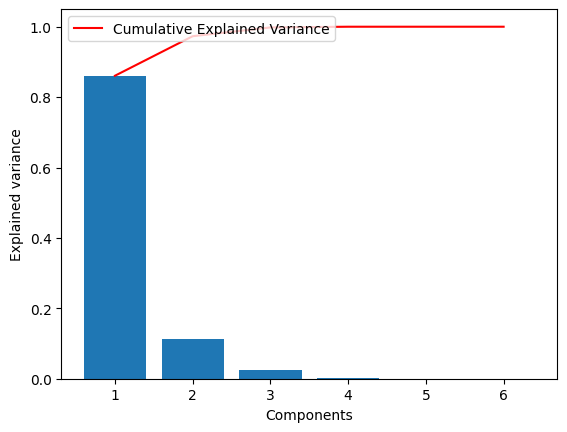

In [874]:
# Cumulative variance explained

plt.bar(range(1,len(pcamodel.explained_variance_ratio_ )+1),pcamodel.explained_variance_ratio_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ratio_ )+1),
         np.cumsum(pcamodel.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

In [875]:
# redo PCA for 2 components

pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(scaled_account_SV)
data_pca = pd.DataFrame(pca, columns=['PC1', 'PC2']) #, 'PC4'
# data_pca.columns = scaled_account_CC.columns
data_pca.head()

,PC1,PC2
0,1.330537,-0.205693
1,-0.426176,0.517964
2,1.326786,-0.094297
3,-0.408112,-0.036285
4,-0.411275,0.074788


Text(0.5, 1.0, 'My PCA Graph')

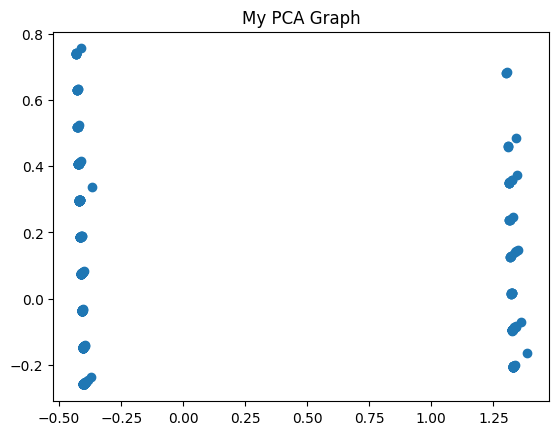

In [876]:
pca_df = pd.DataFrame(data_pca, columns=data_pca.columns)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')

#### Step 6: K-Means Testing

In [877]:
from sklearn.cluster import KMeans
import numpy as np

In [878]:
km = KMeans()

In [879]:
# use elbow rule to figure out how many clusters to use

def plot_distortion(transformed_df,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(transformed_df)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

#### Step 6a: K-Means on Credit Accounts


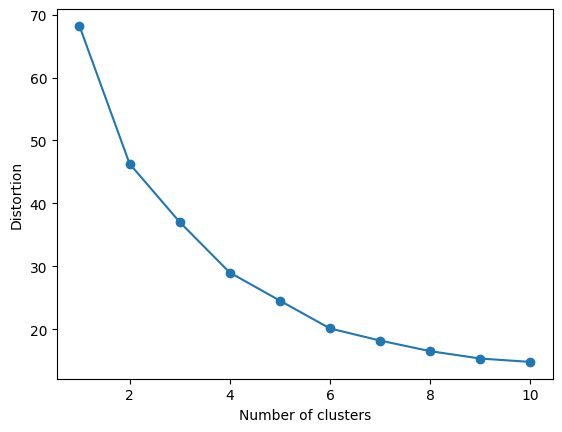

In [880]:
plot_distortion(scaled_account_CC,max_clusters = 10)

In [881]:
km = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

In [882]:
# fit and predict
y_km_CC = km.fit_predict(scaled_account_CC)

In [883]:
y_km_CC

array([0, 0, 0, 0, 0, 3, 1, 1, 0, 1, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       3, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 3,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 3, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 3, 0, 0, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 1, 0, 3, 1, 2, 3, 1, 3, 0, 1, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 1, 1, 0, 1, 1, 1, 0, 3, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 1, 0, 1,
       3, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 3, 0, 1, 3, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 1, 0, 1,

In [884]:
scaled_account_CC['CC_km'] = y_km_CC

CC_km0 = scaled_account_CC[scaled_account_CC['CC_km'] == 0].mean().tolist()
CC_km1 = scaled_account_CC[scaled_account_CC['CC_km'] == 1].mean().tolist()
CC_km2 = scaled_account_CC[scaled_account_CC['CC_km'] == 2].mean().tolist()
CC_km3 = scaled_account_CC[scaled_account_CC['CC_km'] == 3].mean().tolist()

CC_means = scaled_account_CC.mean().tolist()
CC_columns = scaled_account_CC.columns.tolist()

In [909]:
import plotly.graph_objects as go

categories = CC_columns

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=CC_km0[:-1],
      theta=categories[:-1],
      fill='toself',
      name='Cluster 0'
))
fig.add_trace(go.Scatterpolar(
      r=CC_km1[:-1],
      theta=categories[:-1],
      fill='toself',
      name='Cluster 1'
))
fig.add_trace(go.Scatterpolar(
      r=CC_km2[:-1],
      theta=categories[:-1],
      fill='toself',
      name='Cluster 2'
))
fig.add_trace(go.Scatterpolar(
      r=CC_km3[:-1],
      theta=categories[:-1],
      fill='toself',
      name='Cluster 3'
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.75]
    )),
  showlegend=True
)

fig.show()

#### Step 6b: K-Means on Checking Accounts


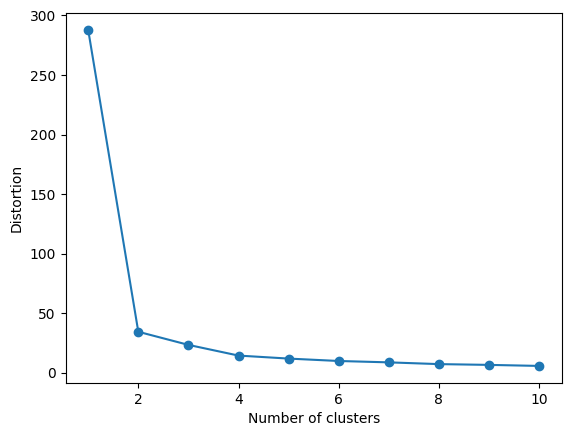

In [889]:
plot_distortion(scaled_account_CK,max_clusters = 10)

In [890]:
km = KMeans(n_clusters=2, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

In [891]:
# fit and predict
y_km_CK = km.fit_predict(scaled_account_CK)

In [892]:
y_km_CK

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,

In [893]:
scaled_account_CK['CK_km'] = y_km_CK

CK_km0 = scaled_account_CK[scaled_account_CK['CK_km'] == 0].mean().tolist()
CK_km1 = scaled_account_CK[scaled_account_CK['CK_km'] == 1].mean().tolist()
# CK_km2 = scaled_account_CK[scaled_account_CK['CK_km'] == 2].mean().tolist()

CK_means = scaled_account_CK.mean().tolist()
CK_columns = scaled_account_CK.columns.tolist()

In [911]:
import plotly.graph_objects as go

categories = CK_columns

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=CK_km0[:-1],
      theta=categories[:-1],
      fill='toself',
      name='Cluster 0'
))
fig.add_trace(go.Scatterpolar(
      r=CK_km1[:-1],
      theta=categories[:-1],
      fill='toself',
      name='Cluster 1'
))
# fig.add_trace(go.Scatterpolar(
#       r=CK_km2[:-1],
#       theta=categories[:-1],
#       fill='toself',
#       name='Product C'
# ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()

#### Step 6c: K-Means on Savings Accounts


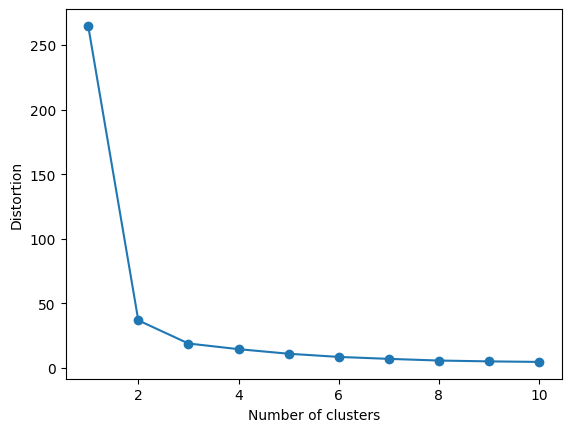

In [895]:
plot_distortion(scaled_account_SV,max_clusters = 10)

In [896]:
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

In [897]:
# fit and predict
y_km_SV = km.fit_predict(scaled_account_SV)

In [898]:
y_km_SV

array([0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1, 1,
       1, 2, 2, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0,
       2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 2,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0,
       1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 1, 2, 1, 1, 0, 2, 0, 0, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 2,
       1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 2, 0, 0, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 0, 1, 2, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2,

In [899]:
scaled_account_SV['SV_km'] = y_km_SV

SV_km0 = scaled_account_SV[scaled_account_SV['SV_km'] == 0].mean().tolist()
SV_km1 = scaled_account_SV[scaled_account_SV['SV_km'] == 1].mean().tolist()
SV_km2 = scaled_account_SV[scaled_account_SV['SV_km'] == 2].mean().tolist()

SV_means = scaled_account_SV.mean().tolist()
SV_columns = scaled_account_SV.columns.tolist()

In [912]:
import plotly.graph_objects as go

categories = SV_columns

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=SV_km0[:-1],
      theta=categories[:-1],
      fill='toself',
      name='Cluster 0'
))
fig.add_trace(go.Scatterpolar(
      r=SV_km1[:-1],
      theta=categories[:-1],
      fill='toself',
      name='Cluster 1'
))
fig.add_trace(go.Scatterpolar(
      r=SV_km2[:-1],
      theta=categories[:-1],
      fill='toself',
      name='Cluster 2'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()

### Transactions Tables

In [802]:
checking_tran_df.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,-0.15,-0.15,0.0,58.99,29.1.1995,,,FK
1,1362784,90,-200.00,-200.00,0.0,1380.69,2.7.1995,53313,A,WD
2,1363088,46,0.00,0.00,0.0,128.35,26.3.1995,834,A,IQ
3,1363306,32,-40.32,-40.32,0.0,433.06,29.1.1995,,P,WD
4,1363251,11,-87.88,-87.88,0.0,1919.55,8.2.1995,,P,WD


In [803]:
checking_tran_df['tran_time'] = checking_tran_df['tran_time'].str.strip()
checking_tran_df['tran_time'].isnull().sum()

0

In [804]:
checking_tran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46204 entries, 0 to 46203
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        46204 non-null  int64  
 1   tran_id        46204 non-null  int64  
 2   tran_amt       46204 non-null  float64
 3   principal_amt  46204 non-null  float64
 4   interest_amt   46204 non-null  float64
 5   new_balance    46204 non-null  float64
 6   tran_date      46204 non-null  object 
 7   tran_time      46204 non-null  object 
 8   channel        46204 non-null  object 
 9   tran_code      46204 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 3.5+ MB


In [805]:
credit_tran_df.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG


In [806]:
credit_tran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20167 entries, 0 to 20166
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        20167 non-null  int64  
 1   tran_id        20167 non-null  int64  
 2   tran_amt       20167 non-null  float64
 3   principal_amt  20167 non-null  float64
 4   interest_amt   20167 non-null  float64
 5   new_balance    20167 non-null  float64
 6   tran_date      20167 non-null  object 
 7   tran_time      20167 non-null  object 
 8   channel        20167 non-null  object 
 9   tran_code      20167 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 1.5+ MB


In [807]:
customer_df['state_code'].nunique()

33

In [808]:
customer_df['postal_code'].nunique()

442

In [809]:
customer_df.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000


In [810]:
savings_tran_df.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP


In [811]:
savings_tran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11189 entries, 0 to 11188
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        11189 non-null  int64  
 1   tran_id        11189 non-null  int64  
 2   tran_amt       11189 non-null  float64
 3   principal_amt  11189 non-null  float64
 4   interest_amt   11189 non-null  float64
 5   new_balance    11189 non-null  float64
 6   tran_date      11189 non-null  object 
 7   tran_time      11189 non-null  object 
 8   channel        11189 non-null  object 
 9   tran_code      11189 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 874.3+ KB


In [812]:
transactions_df.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ


In [813]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77580 entries, 0 to 77579
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tran_id        77580 non-null  int64  
 1   acct_nbr       77580 non-null  int64  
 2   tran_amt       77580 non-null  float64
 3   principal_amt  77580 non-null  float64
 4   interest_amt   77580 non-null  float64
 5   new_balance    77580 non-null  float64
 6   tran_date      77580 non-null  object 
 7   tran_time      77580 non-null  int64  
 8   channel        77580 non-null  object 
 9   tran_code      77580 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 5.9+ MB
